<a href="https://colab.research.google.com/github/GusRonconi/RBP5802---2024/blob/main/Projeto_disciplina_RBP5802.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto Final


#### Conjunto de dados
O conjunto de dados utilizado neste projeto final foi retirado do repositório online de dados Kaggel. <br>
O conjunto escolhido dispoem de dados clínicos e acústico vocais de pacientes com doença de Parkinson <br>
Disponível em: https://www.kaggle.com/datasets/shreyadutta1116/parkinsons-disease <br>


In [ ]:
# Importar as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Lendo um arquivo do Google Drive
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Mostrar as 10 primeiras linhas
df.head(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1.0,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1.0,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1.0,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1.0,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1.0,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
# Mostrar as 10 últimas linhas
df.tail(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
1190,synth_7756,151.028206,179.206312,118.797466,0.006594,0.000040,0.003458,0.003513,0.008731,0.027186,...,0.050788,0.021377,21.884979,0.736271,0.499528,0.727604,-5.772439,0.234236,2.392305,0.210778
1191,synth_5355,161.752472,211.299774,114.784598,0.006397,0.000045,0.003545,0.003017,0.009591,0.028982,...,0.049785,0.020925,21.973752,0.798377,0.499209,0.728558,-5.604039,0.235680,2.362850,0.209570
1192,synth_6356,148.323186,194.399282,118.570170,0.006335,0.000044,0.003483,0.003386,0.008980,0.029598,...,0.051215,0.021530,21.615298,0.771907,0.497459,0.717687,-5.770640,0.233789,2.410545,0.223595
1193,synth_7098,152.106305,209.880095,112.903699,0.005298,0.000041,0.002778,0.003506,0.009388,0.029550,...,0.049023,0.026806,21.561977,0.704315,0.486495,0.722529,-5.677169,0.236918,2.427505,0.218734
1194,synth_1997,151.964173,211.553642,120.752900,0.005573,0.000040,0.003039,0.002910,0.011217,0.031296,...,0.049004,0.020198,21.637952,0.735387,0.508520,0.720055,-5.884754,0.228012,2.395277,0.197326


In [ ]:
## Anotação Coluna Status: 0 = diagnóstico negativo | 1 = diagnóstico positivo

In [ ]:
# Transformar todos os valores abaixo de 1 em 0
df['status'] = (df['status'] == 1).astype(int)


In [ ]:
df.tail(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
1190,synth_7756,151.028206,179.206312,118.797466,0.006594,0.000040,0.003458,0.003513,0.008731,0.027186,...,0.050788,0.021377,21.884979,0,0.499528,0.727604,-5.772439,0.234236,2.392305,0.210778
1191,synth_5355,161.752472,211.299774,114.784598,0.006397,0.000045,0.003545,0.003017,0.009591,0.028982,...,0.049785,0.020925,21.973752,0,0.499209,0.728558,-5.604039,0.235680,2.362850,0.209570
1192,synth_6356,148.323186,194.399282,118.570170,0.006335,0.000044,0.003483,0.003386,0.008980,0.029598,...,0.051215,0.021530,21.615298,0,0.497459,0.717687,-5.770640,0.233789,2.410545,0.223595
1193,synth_7098,152.106305,209.880095,112.903699,0.005298,0.000041,0.002778,0.003506,0.009388,0.029550,...,0.049023,0.026806,21.561977,0,0.486495,0.722529,-5.677169,0.236918,2.427505,0.218734
1194,synth_1997,151.964173,211.553642,120.752900,0.005573,0.000040,0.003039,0.002910,0.011217,0.031296,...,0.049004,0.020198,21.637952,0,0.508520,0.720055,-5.884754,0.228012,2.395277,0.197326


In [ ]:
# Listar os nomes das colunas
df.columns.to_list()

['name',
 'MDVP:Fo(Hz)',
 'MDVP:Fhi(Hz)',
 'MDVP:Flo(Hz)',
 'MDVP:Jitter(%)',
 'MDVP:Jitter(Abs)',
 'MDVP:RAP',
 'MDVP:PPQ',
 'Jitter:DDP',
 'MDVP:Shimmer',
 'MDVP:Shimmer(dB)',
 'Shimmer:APQ3',
 'Shimmer:APQ5',
 'MDVP:APQ',
 'Shimmer:DDA',
 'NHR',
 'HNR',
 'status',
 'RPDE',
 'DFA',
 'spread1',
 'spread2',
 'D2',
 'PPE']

In [ ]:
# contabilizando cada classe
df.status.unique()
df.status.value_counts()

,count
status,
0,1048
1,147


In [ ]:
import seaborn as sns; sns.set()
# sns.pairplot(df, hue='status', size=1.5);
# correlação entre as features, dispersão

In [ ]:
# Separar os dados em target e features
# Salvando a coluna target na variável predict
y = df['status'] # target

X = df.drop(['status','name'], axis=1) # feature

In [ ]:
# formato do X e do y
print("Formato de X é:", X.shape)
print("Formato de y é:", y.shape)
# precisam ter a mesma quantidade de linhas

Formato de X é: (1195, 22)
Formato de y é: (1195,)


In [ ]:
# Aplicar a Validação Cruzada
from sklearn.model_selection import train_test_split

# Dividindo os dados em conjunto treinamento e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, random_state=42, stratify=y)

print(X_treino.shape)
print(X_teste.shape)

print(y_treino.shape)
print(y_teste.shape)

(896, 22)
(299, 22)
(896,)
(299,)


In [ ]:
# Importando a biblioteca dos modelos
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import scale
from sklearn import metrics
from matplotlib.backends.backend_pdf import PdfPages


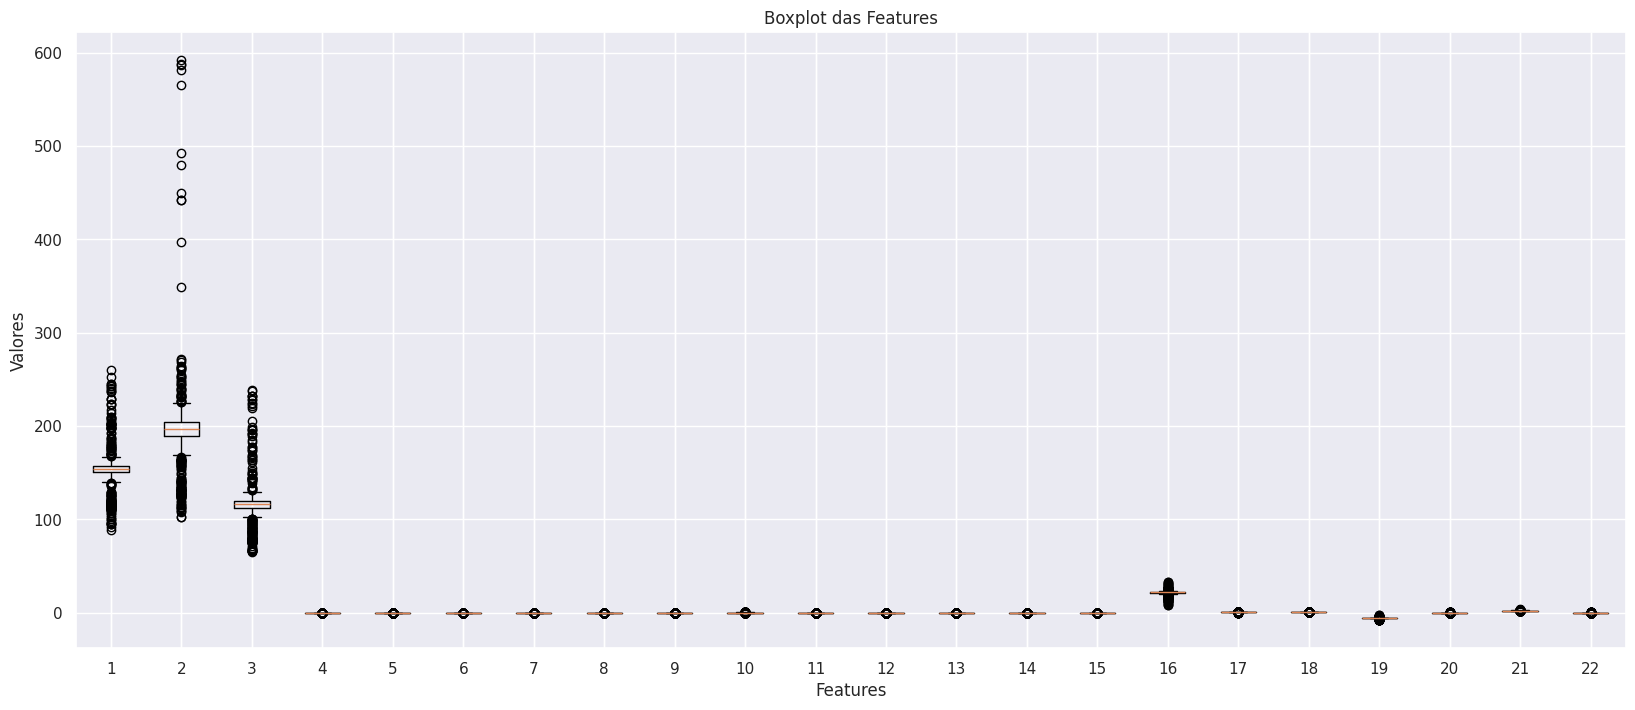

In [ ]:
## BOXPLOT
with PdfPages('boxplot.pdf') as pdf:
  plt.figure(figsize=(20, 8))
  plt.xticks(range(1, len(df.columns) + 1), df.columns)
  plt.boxplot(X)
  plt.xlabel('Features')
  plt.ylabel('Valores')
  plt.title('Boxplot das Features')
  pdf.savefig()
  plt.show()
  plt.close()

Text(0.5, 1.0, 'Boxplot das Features')

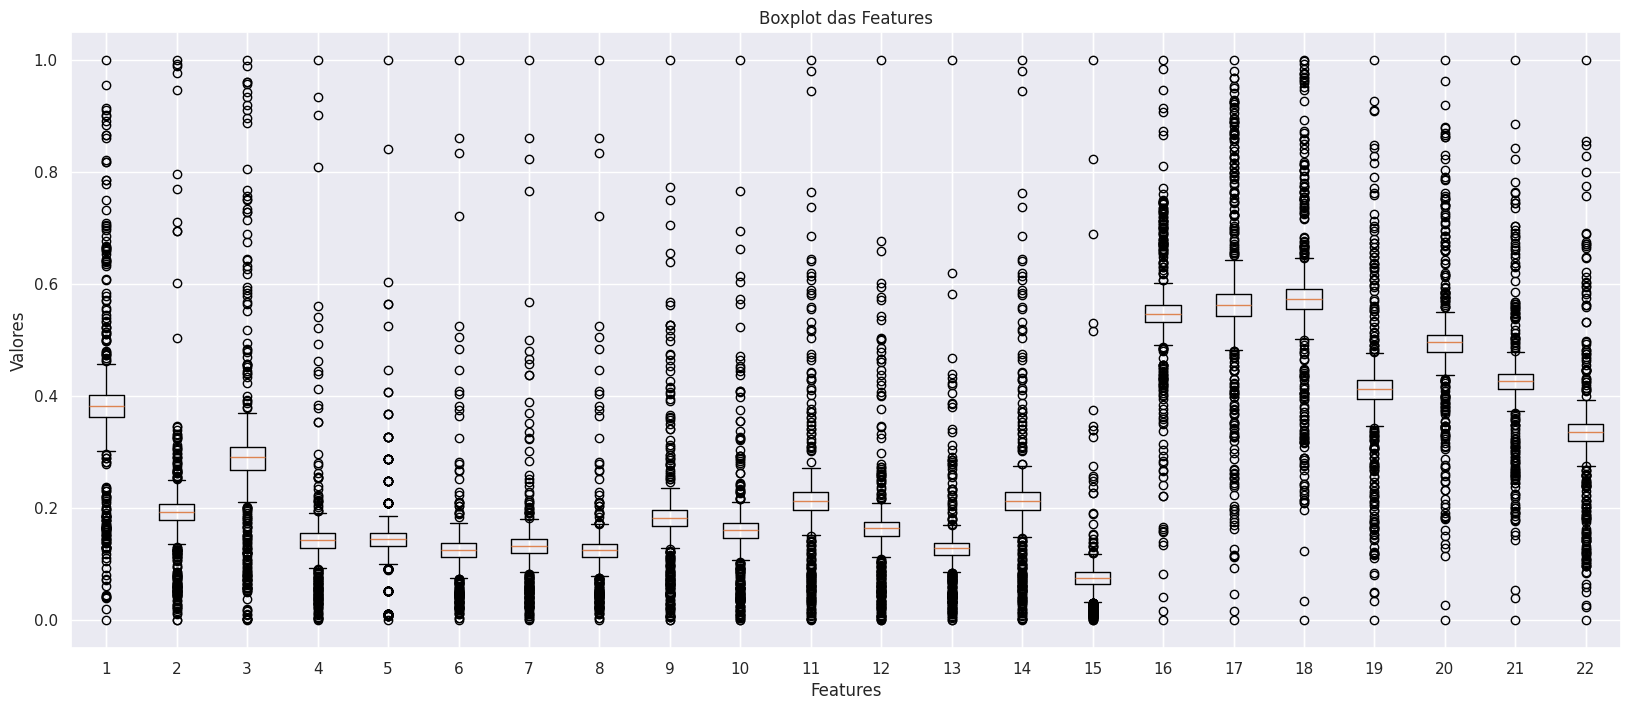

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Escolanar o df X
scaler = MinMaxScaler()
X_scl = scaler.fit_transform(X)

plt.figure(figsize=(20, 8))
plt.xticks(range(1, len(df.columns) + 1), df.columns)
plt.boxplot(X_scl)
plt.xlabel('Features')
plt.ylabel('Valores')
plt.title('Boxplot das Features')

## Modelos de Classificação

## Modelo - Random Forest Classifier

In [ ]:
# Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_treino, y_treino)

RandomForestClassifier()

In [ ]:
# ajustando o modelo ao conjunto de treinamento
random_forest.fit(X_treino, y_treino)

RandomForestClassifier()

In [ ]:
#predizendo valores no conjunto teste
y_pred_random_forest = random_forest.predict(X_teste)
y_pred_random_forest

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0])

In [ ]:
# Matriz de Confusão
matriz_confusao_forest = metrics.confusion_matrix(y_teste, y_pred_random_forest)
matriz_confusao_forest


array([[259,   3],
       [  0,  37]])

<table>
      <colgroup>
        <col span="2" style="background-color:red">
        <col style="background-color:yellow">
        <!--
          span -> define número de colunas que terá este estilo
          style -> definições de estilo
        -->
      </colgroup>
      <tr>
        <th>Matriz de Confusão</th>
        <th>Predito Positivo</th>
        <th>Predito Negativo</th>
      <tr/>
      <tr>
        <th>Observado Positivo</th>
        <td>Verdadeiro Positivo</td>
        <td>Falso Negativo</td>
      </tr>
      <tr>
        <th>Observado Negativo</th>
        <td>Falso Positivo</td>
        <td>Verdadeiro Negativo</td>
    </table>


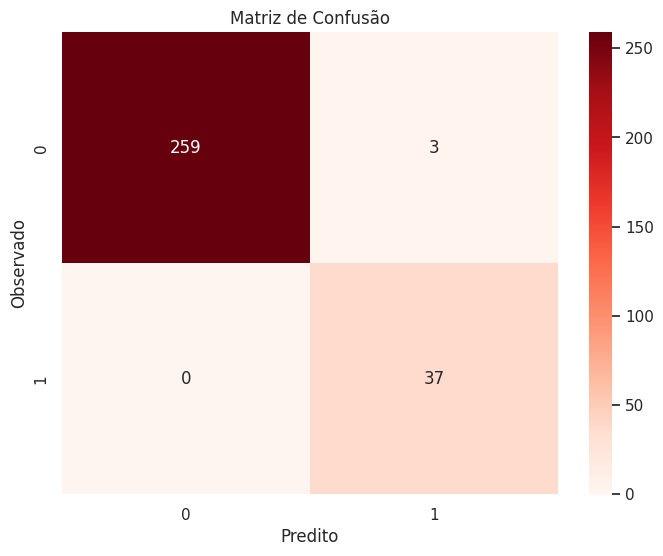

In [ ]:
# Visualizar mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao_forest, annot=True, fmt='g', cmap='Reds')
plt.xlabel('Predito')
plt.ylabel('Observado')
plt.title('Matriz de Confusão')
plt.show()

In [ ]:
# Calculando as métricas
print(classification_report(y_teste, y_pred_random_forest))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       262
           1       0.93      1.00      0.96        37

    accuracy                           0.99       299
   macro avg       0.96      0.99      0.98       299
weighted avg       0.99      0.99      0.99       299



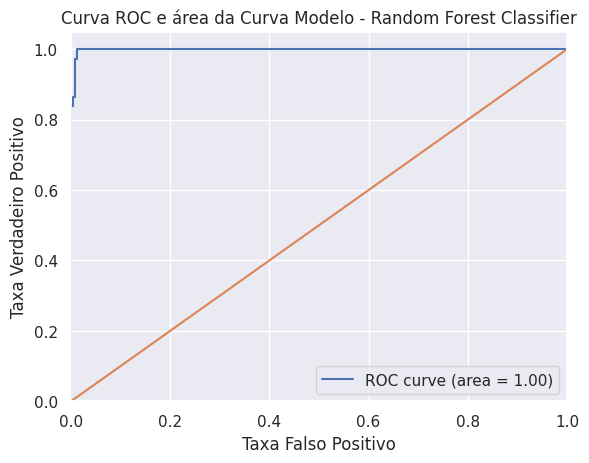

In [ ]:
# Obtém as probabilidades das predições para a classe positiva
y_proba_forest = random_forest.predict_proba(X_teste)[:, 1]

# Calcular a TPR e FPR
fpr_forest, tpr_forest, thresholds = roc_curve(y_teste, y_proba_forest)

# Calcular a AUC
roc_auc = roc_auc_score(y_teste, y_proba_forest)

# Plotar a curva ROC
plt.plot(fpr_forest, tpr_forest, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa Falso Positivo')
plt.ylabel('Taxa Verdadeiro Positivo')
plt.title('Curva ROC e área da Curva Modelo - Random Forest Classifier')
plt.legend(loc="lower right")
plt.show()


## Modelo - Regressão Logística

In [ ]:
# Escalonando os dados
X_treino_scaled = scale(X_treino)
X_teste_scaled = scale(X_teste)

In [ ]:
# Teste sem escalonar
# Regressão Logística
logistic_regression = LogisticRegression()

# Ajustando o modelo
logistic_regression.fit(X_treino, y_treino)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Predizendo Valores
y_pred_logistic_regression = logistic_regression.predict(X_teste)
y_pred_logistic_regression

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# Matriz de Confusão
matriz_confusao_logistic = metrics.confusion_matrix(y_teste, y_pred_logistic_regression)
matriz_confusao_logistic

array([[262,   0],
       [ 26,  11]])

<table>
      <colgroup>
        <col span="2" style="background-color:red">
        <col style="background-color:yellow">
        <!--
          span -> define número de colunas que terá este estilo
          style -> definições de estilo
        -->
      </colgroup>
      <tr>
        <th>Matriz de Confusão</th>
        <th>Predito Positivo</th>
        <th>Predito Negativo</th>
      <tr/>
      <tr>
        <th>Observado Positivo</th>
        <td>Verdadeiro Positivo</td>
        <td>Falso Negativo</td>
      </tr>
      <tr>
        <th>Observado Negativo</th>
        <td>Falso Positivo</td>
        <td>Verdadeiro Negativo</td>
    </table>

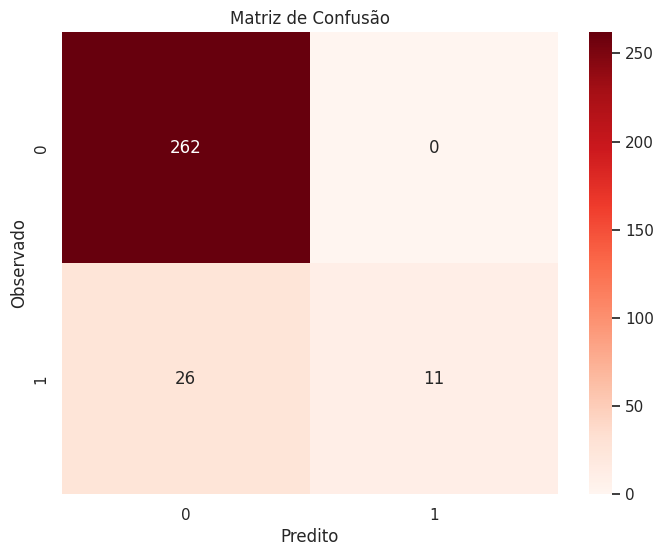

In [ ]:
# Visualizar mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao_logistic, annot=True, fmt='g', cmap='Reds')
plt.xlabel('Predito')
plt.ylabel('Observado')
plt.title('Matriz de Confusão')
plt.show()

In [ ]:
# Calculando as métricas
print(classification_report(y_teste, y_pred_logistic_regression))
# a referência é sempre a classe 1

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       262
           1       1.00      0.30      0.46        37

    accuracy                           0.91       299
   macro avg       0.95      0.65      0.71       299
weighted avg       0.92      0.91      0.89       299



In [ ]:

# Obtém as probabilidades das predições para a classe positiva
y_proba_lr = logistic_regression.predict_proba(X_teste)[:, 1]

# Calcular a TPR e FPR
fpr_lr, tpr_lr, thresholds = roc_curve(y_teste, y_proba_lr)

# Calcular a AUC
roc_auc = roc_auc_score(y_teste, y_proba_lr)

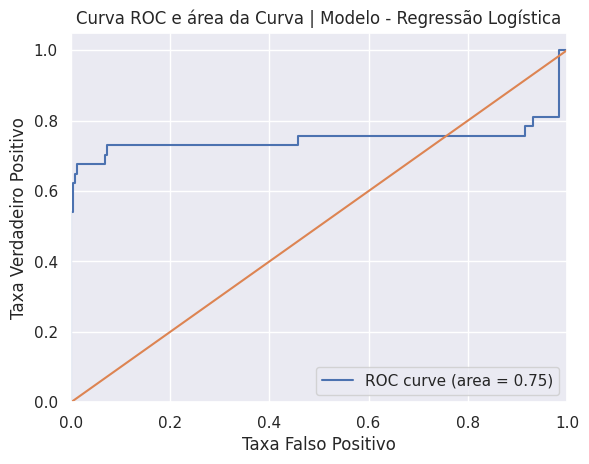

In [ ]:
# Plotar a curva ROC
plt.plot(fpr_lr, tpr_lr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa Falso Positivo')
plt.ylabel('Taxa Verdadeiro Positivo')
plt.title('Curva ROC e área da Curva | Modelo - Regressão Logística')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Escalonando os dados
X_treino_scaled = scale(X_treino)
X_teste_scaled = scale(X_teste)
print("Formato X_teste_scaled:",X_teste_scaled.shape)
print("Formato X_treino_scaled:",X_treino_scaled.shape)

Formato X_teste_scaled: (299, 22)
Formato X_treino_scaled: (896, 22)


Matriz de confusão escalonada 
 [[283   2]
 [  5   9]]
Métricas:               precision    recall  f1-score   support

           0       0.98      0.99      0.99       285
           1       0.82      0.64      0.72        14

    accuracy                           0.98       299
   macro avg       0.90      0.82      0.85       299
weighted avg       0.97      0.98      0.98       299



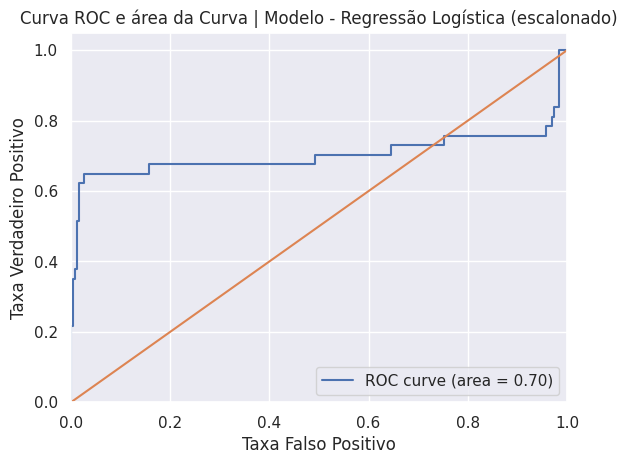

In [ ]:
# Treinando o modelo com os dados escalonados
modelo_escalonado_lr = logistic_regression.fit(X_treino_scaled, y_treino)
y_escalonado_logistic_regression = modelo_escalonado_lr.predict(X_teste_scaled)

# Matriz de Confusão
mc_escalonado_logistic = metrics.confusion_matrix(y_escalonado_logistic_regression, y_pred_logistic_regression)
print('Matriz de confusão escalonada \n',mc_escalonado_logistic)

# Calculando as métricas
print('Métricas:',classification_report(y_escalonado_logistic_regression, y_pred_logistic_regression))
# a referência é sempre a classe 1

# Obtém as probabilidades das predições para a classe positiva
y_proba_lr_scaled = modelo_escalonado_lr.predict_proba(X_teste_scaled)[:, 1]

# Calcular a TPR e FPR
fpr_lr_scaled, tpr_lr_scaled, thresholds = roc_curve(y_teste, y_proba_lr_scaled)

# Calcular a AUC
roc_auc = roc_auc_score(y_teste, y_proba_lr_scaled)

# Plotar a curva ROC
plt.plot(fpr_lr_scaled, tpr_lr_scaled, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa Falso Positivo')
plt.ylabel('Taxa Verdadeiro Positivo')
plt.title('Curva ROC e área da Curva | Modelo - Regressão Logística (escalonado)')
plt.legend(loc="lower right")
plt.show()

## Modelo - Árvore de Decisão

In [ ]:
# Chamando o modelo
decision_tree = DecisionTreeClassifier()

In [ ]:
# Ajustando o modelo
decision_tree.fit(X_treino, y_treino)

DecisionTreeClassifier()

In [ ]:
# Predizendo os valores
y_pred_decision_tree = decision_tree.predict(X_teste)
y_pred_decision_tree

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0])

In [ ]:
matriz_confusao_tree = metrics.confusion_matrix(y_teste, y_pred_decision_tree)
matriz_confusao_tree

array([[256,   6],
       [  2,  35]])

<table>
      <colgroup>
        <col span="2" style="background-color:red">
        <col style="background-color:yellow">
        <!--
          span -> define número de colunas que terá este estilo
          style -> definições de estilo
        -->
      </colgroup>
      <tr>
        <th>Matriz de Confusão</th>
        <th>Predito Positivo</th>
        <th>Predito Negativo</th>
      <tr/>
      <tr>
        <th>Observado Positivo</th>
        <td>Verdadeiro Positivo</td>
        <td>Falso Negativo</td>
      </tr>
      <tr>
        <th>Observado Negativo</th>
        <td>Falso Positivo</td>
        <td>Verdadeiro Negativo</td>
    </table>

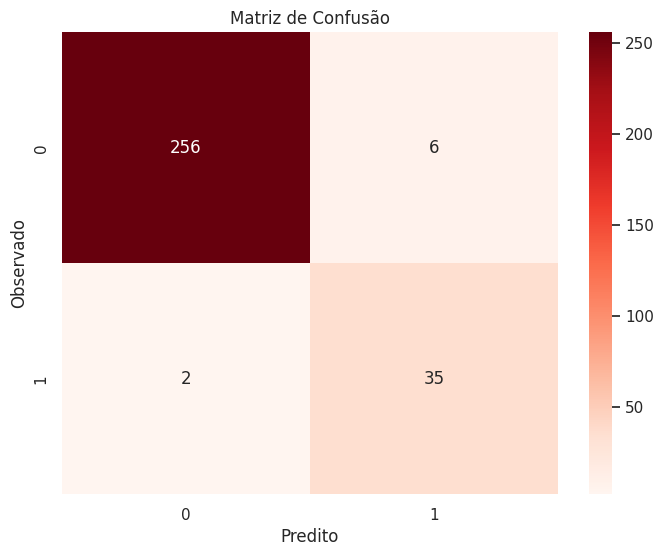

In [ ]:
# Visualizar mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao_tree, annot=True, fmt='g', cmap='Reds')
plt.xlabel('Predito')
plt.ylabel('Observado')
plt.title('Matriz de Confusão')
plt.show()

In [ ]:
# Calculando as métricas
print(classification_report(y_teste, y_pred_decision_tree))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       262
           1       0.85      0.95      0.90        37

    accuracy                           0.97       299
   macro avg       0.92      0.96      0.94       299
weighted avg       0.98      0.97      0.97       299



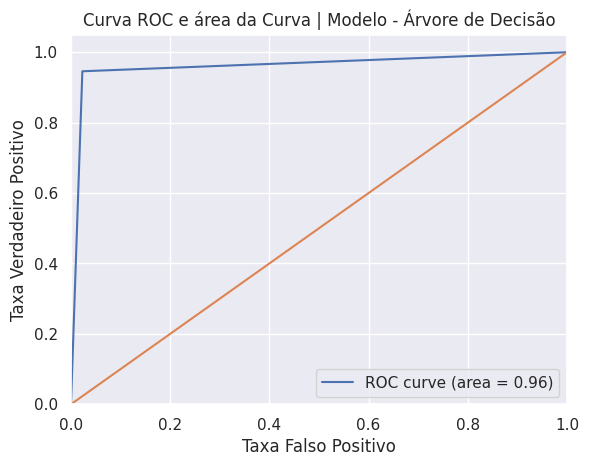

In [ ]:
# Obtém as probabilidades das predições para a classe positiva
y_proba_tree = decision_tree.predict_proba(X_teste)[:, 1]

# Calcular a TPR e FPR
fpr_tree, tpr_tree, thresholds = roc_curve(y_teste, y_proba_tree)

# Calcular a AUC
roc_auc = roc_auc_score(y_teste, y_proba_tree)

# Plotar a curva ROC
plt.plot(fpr_tree, tpr_tree, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa Falso Positivo')
plt.ylabel('Taxa Verdadeiro Positivo')
plt.title('Curva ROC e área da Curva | Modelo - Árvore de Decisão')
plt.legend(loc="lower right")
plt.show()

## Modelo - Maquina de Vetor de Suporte (SVC)

In [ ]:
# Criando o modelo
svm = SVC(random_state=42, probability= True)
# Ajustando o modelo
svm.fit(X_treino, y_treino)

SVC(probability=True, random_state=42)

In [ ]:
# Predizendo os valores
pred_svm = svm.predict(X_teste)
pred_svm

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0])

In [ ]:
# Matriz de confusão
matriz_confusao_svm = metrics.confusion_matrix(y_teste, pred_svm)
matriz_confusao_svm

array([[256,   6],
       [ 21,  16]])

<table>
      <colgroup>
        <col span="2" style="background-color:red">
        <col style="background-color:yellow">
        <!--
          span -> define número de colunas que terá este estilo
          style -> definições de estilo
        -->
      </colgroup>
      <tr>
        <th>Matriz de Confusão</th>
        <th>Predito Positivo</th>
        <th>Predito Negativo</th>
      <tr/>
      <tr>
        <th>Observado Positivo</th>
        <td>Verdadeiro Positivo</td>
        <td>Falso Negativo</td>
      </tr>
      <tr>
        <th>Observado Negativo</th>
        <td>Falso Positivo</td>
        <td>Verdadeiro Negativo</td>
    </table>

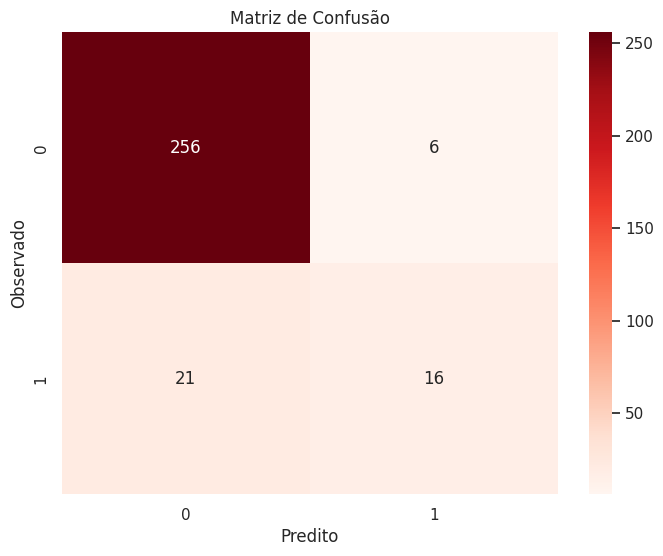

In [ ]:
import seaborn as sns

# Visualizar mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao_svm, annot=True, fmt='g', cmap='Reds')
plt.xlabel('Predito')
plt.ylabel('Observado')
plt.title('Matriz de Confusão')
plt.show()

In [ ]:
# Calculando as métricas
print(classification_report(y_teste, pred_svm))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       262
           1       0.73      0.43      0.54        37

    accuracy                           0.91       299
   macro avg       0.83      0.70      0.75       299
weighted avg       0.90      0.91      0.90       299



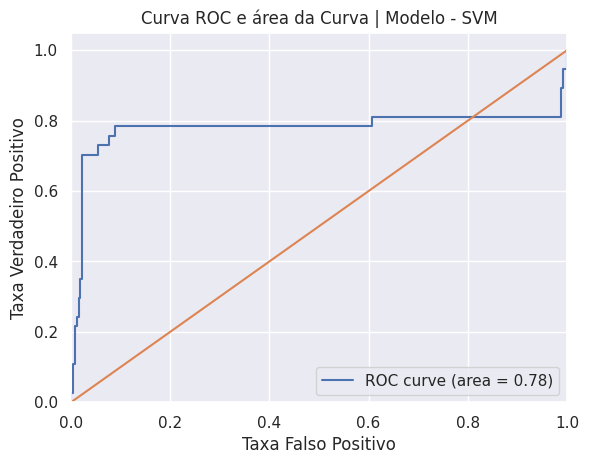

In [ ]:
# Obtém as probabilidades das predições para a classe positiva
y_proba_svm = svm.predict_proba(X_teste)[:, 1]

# Calcular a TPR e FPR
fpr_svm, tpr_svm, thresholds = roc_curve(y_teste, y_proba_svm)

# Calcular a AUC
roc_auc = roc_auc_score(y_teste, y_proba_svm)

# Plotar a curva ROC
plt.plot(fpr_svm, tpr_svm, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa Falso Positivo')
plt.ylabel('Taxa Verdadeiro Positivo')
plt.title('Curva ROC e área da Curva | Modelo - SVM')
plt.legend(loc="lower right")
plt.show()

Matriz de confusão escalonada 
 [[254   4]
 [ 23  18]]
Métricas:               precision    recall  f1-score   support

           0       0.92      0.98      0.95       258
           1       0.82      0.44      0.57        41

    accuracy                           0.91       299
   macro avg       0.87      0.71      0.76       299
weighted avg       0.90      0.91      0.90       299



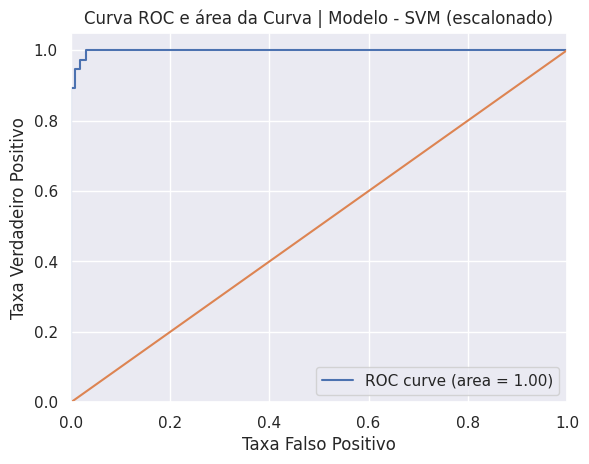

In [ ]:
# Treinando o modelo com os dados escalonados
modelo_escalonado_svm = svm.fit(X_treino_scaled, y_treino)
y_escalonado_svm = modelo_escalonado_svm.predict(X_teste_scaled)

# Matriz de Confusão
mc_escalonado_svm = metrics.confusion_matrix(y_escalonado_svm, pred_svm)
print('Matriz de confusão escalonada \n',mc_escalonado_svm)

# Calculando as métricas
print('Métricas:',classification_report(y_escalonado_svm, pred_svm))
# a referência é sempre a classe 1

# Obtém as probabilidades das predições para a classe positiva
y_proba_svm_scaled = modelo_escalonado_svm.predict_proba(X_teste_scaled)[:, 1]

# Calcular a TPR e FPR
fpr_svm_scaled, tpr_svm_scaled, thresholds = roc_curve(y_teste, y_proba_svm_scaled)

# Calcular a AUC
roc_auc = roc_auc_score(y_teste, y_proba_svm_scaled)

# Plotar a curva ROC
plt.plot(fpr_svm_scaled, tpr_svm_scaled, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa Falso Positivo')
plt.ylabel('Taxa Verdadeiro Positivo')
plt.title('Curva ROC e área da Curva | Modelo - SVM (escalonado)')
plt.legend(loc="lower right")
plt.show()

## Modelo - Análise de Discriminante Linear

In [ ]:
# Aplicar modelo
lda = LinearDiscriminantAnalysis()


In [ ]:
# Ajustar o modelo
lda.fit(X_treino, y_treino)

LinearDiscriminantAnalysis()

In [ ]:
# predizendo valores do conjunto teste
pred_lda = lda.predict(X_teste)
pred_lda

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# Matriz de confusão
matriz_confusao_discriminante = metrics.confusion_matrix(y_teste, pred_lda)
matriz_confusao_discriminante

array([[262,   0],
       [ 30,   7]])

<table>
      <colgroup>
        <col span="2" style="background-color:red">
        <col style="background-color:yellow">
        <!--
          span -> define número de colunas que terá este estilo
          style -> definições de estilo
        -->
      </colgroup>
      <tr>
        <th>Matriz de Confusão</th>
        <th>Predito Positivo</th>
        <th>Predito Negativo</th>
      <tr/>
      <tr>
        <th>Observado Positivo</th>
        <td>Verdadeiro Positivo</td>
        <td>Falso Negativo</td>
      </tr>
      <tr>
        <th>Observado Negativo</th>
        <td>Falso Positivo</td>
        <td>Verdadeiro Negativo</td>
    </table>

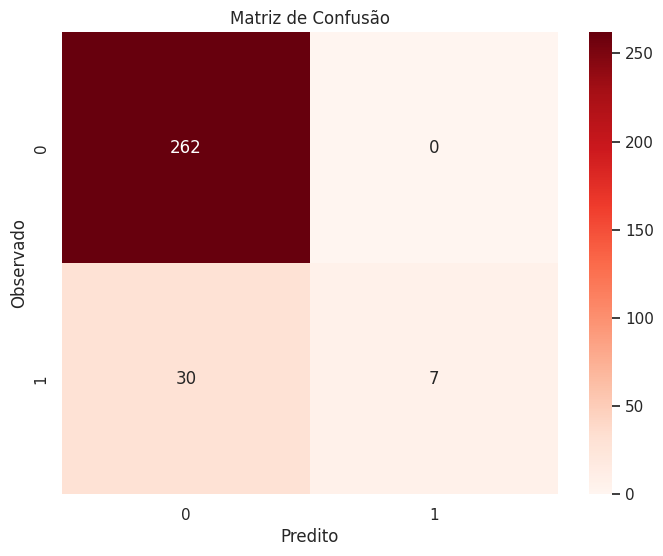

In [ ]:
# Visualizar mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao_discriminante, annot=True, fmt='g', cmap='Reds')
plt.xlabel('Predito')
plt.ylabel('Observado')
plt.title('Matriz de Confusão')
plt.show()

In [ ]:
# Calculando as métricas
print(classification_report(y_teste, pred_lda))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       262
           1       1.00      0.19      0.32        37

    accuracy                           0.90       299
   macro avg       0.95      0.59      0.63       299
weighted avg       0.91      0.90      0.87       299



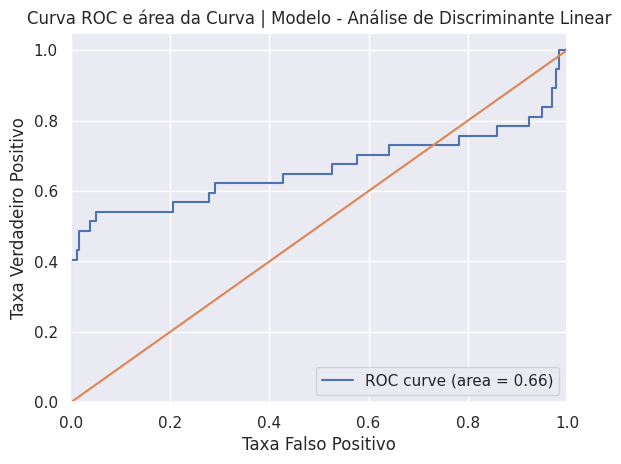

In [ ]:
# Obtém as probabilidades das predições para a classe positiva
y_proba_lda = lda.predict_proba(X_teste)[:, 1]

# Calcular a TPR e FPR
fpr_lda, tpr_lda, thresholds = roc_curve(y_teste, y_proba_lda)

# Calcular a AUC
roc_auc = roc_auc_score(y_teste, y_proba_lda)

# Plotar a curva ROC
plt.plot(fpr_lda, tpr_lda, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa Falso Positivo')
plt.ylabel('Taxa Verdadeiro Positivo')
plt.title('Curva ROC e área da Curva | Modelo - Análise de Discriminante Linear')
plt.legend(loc="lower right")
plt.show()

## Métodos de Agrupamento

## PCA

In [ ]:
from sklearn.decomposition import PCA

# escalonar dos dados
escalonado = scale(X)

In [ ]:
# Verificar a média das variáveis centradas
np.mean(escalonado[:,0])

9.89259813071855e-16

In [ ]:
# Verificando o std
np.std(escalonado[:,0])

1.0

In [ ]:
# Modelo PCA na variável
pca = PCA(n_components=4)

In [ ]:
# Aplicar o modelo aos dados já escalonados
pca.fit(escalonado)

PCA(n_components=4)

In [ ]:
# Transformar os dados originais
X_D = pca.transform(escalonado)
X_D

array([[ 5.0685385 , -3.75684444,  3.05218094, -1.98652725],
       [11.37683434, -3.23171267,  2.58096089, -5.13165746],
       [ 9.30790417, -3.46209207,  4.4065317 , -2.7568679 ],
       ...,
       [ 0.22114398, -0.23993644, -0.1150648 , -0.23774382],
       [-0.01977743, -0.16174457, -0.41537008, -0.31239311],
       [-0.22100769,  0.21311996, -0.19285471, -0.38583112]])

In [ ]:
# Obter variância explicada
pca.explained_variance_ratio_

array([0.56243199, 0.10967095, 0.06885508, 0.06562566])

In [ ]:
sumcum = np.cumsum(pca.explained_variance_ratio_[:4])
sumcum

array([0.56243199, 0.67210294, 0.74095802, 0.80658368])

## Plot de Dendrograma

In [ ]:
# Dendrogramas
import scipy.cluster.hierarchy as sch


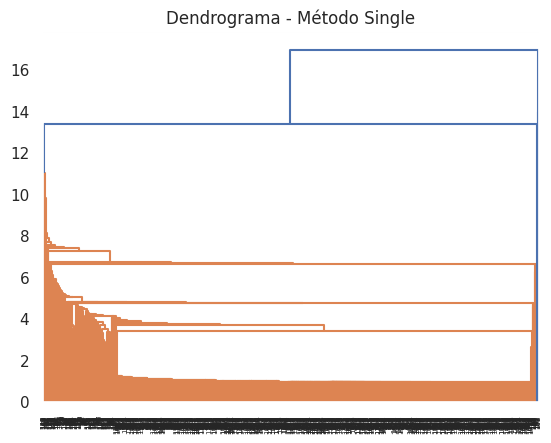

In [ ]:
# Método
sch.dendrogram(sch.linkage(escalonado, method='single'))
plt.title('Dendrograma - Método Single')
plt.show()

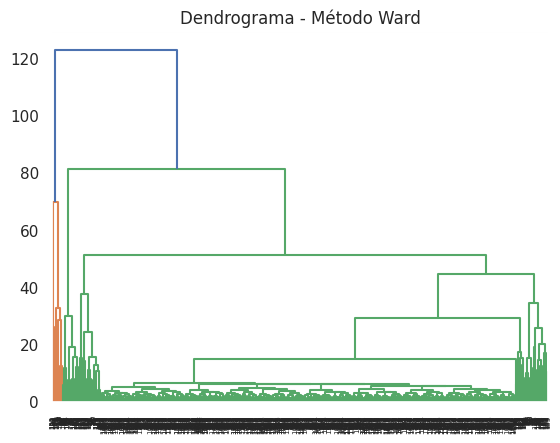

In [ ]:
# Método Ward
sch.dendrogram(sch.linkage(escalonado, method='ward'))
plt.title('Dendrograma - Método Ward')
plt.show()


In [ ]:
# Importando AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering

In [ ]:
cluster = AgglomerativeClustering(n_clusters=2, linkage='ward')

In [ ]:
color_hc = cluster.fit_predict(escalonado, )
color_hc

array([0, 1, 1, ..., 0, 0, 0])

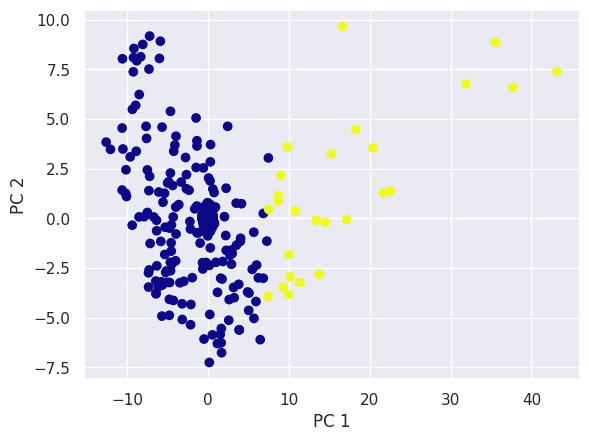

In [ ]:
plt.scatter(X_D[:,0], X_D[:,1], c=color_hc, cmap="plasma" )
plt.xlabel('PC 1') # nomear eixo X
plt.ylabel('PC 2') # nomear eixo Y
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


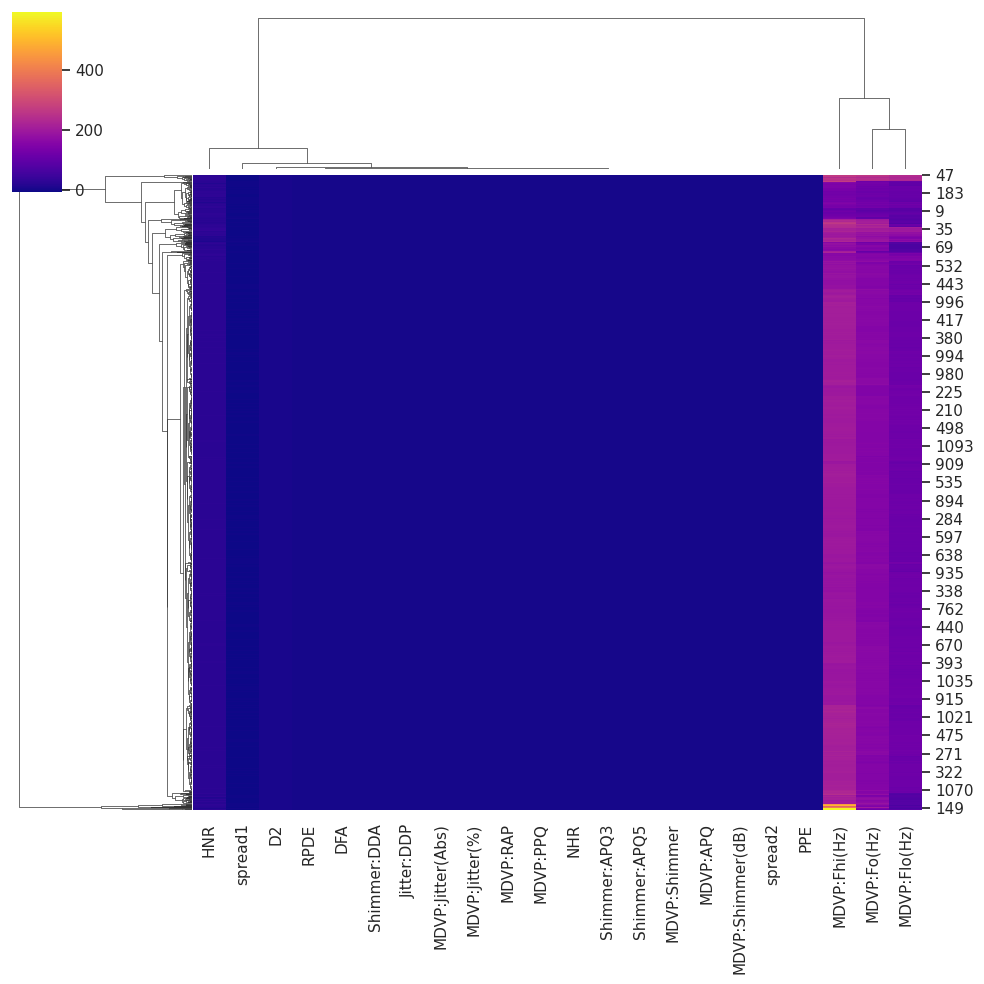

In [ ]:
sns.clustermap(X, cmap="plasma")

In [ ]:
# Visualizar o df para selecionar as features
X.head(2)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674


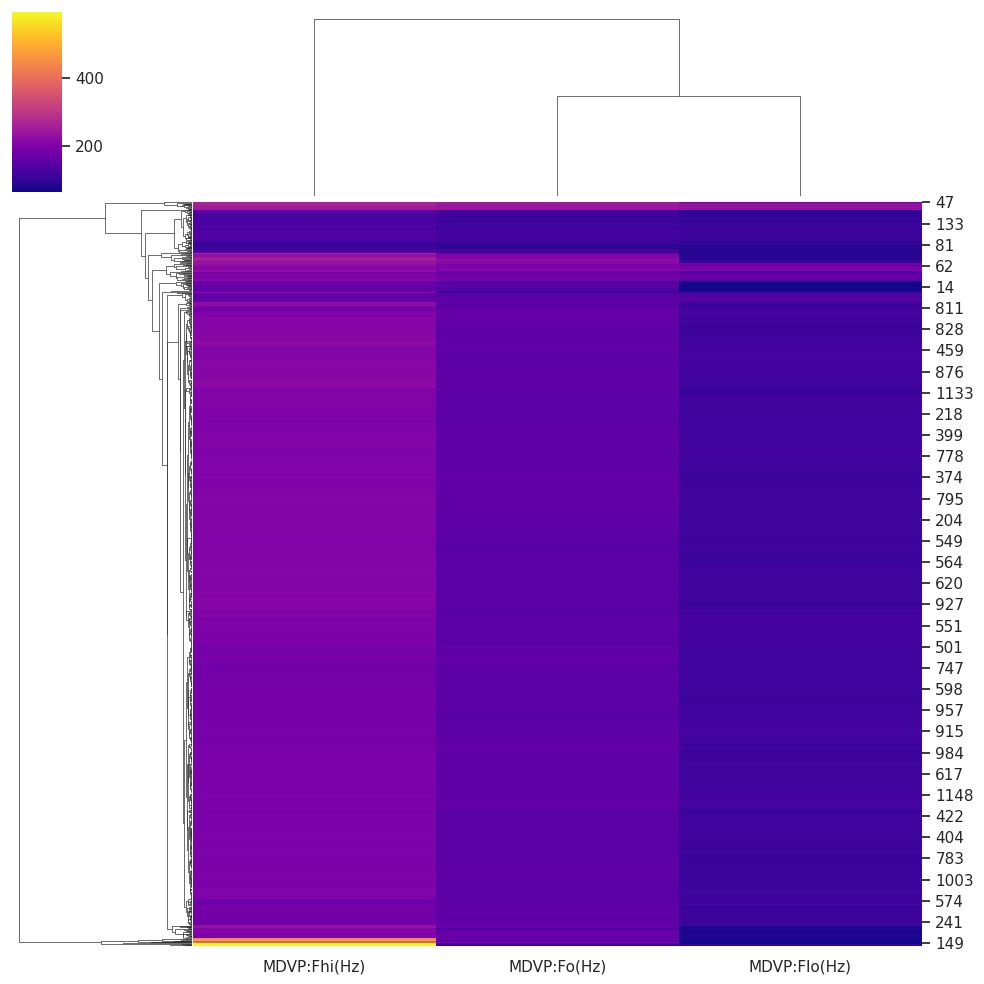

In [ ]:
# Heatmap apenas com as 3 primeiras features
sns.clustermap(X.iloc[:,:3], cmap="plasma")

In [ ]:
cores = dict(zip(df.status.unique(), "rbg"))
cores

{1: 'r', 0: 'b'}

In [ ]:
cores_linhas = df.status.map(cores)

,status
0,r
1,r
2,r
3,r
4,r
...,...
1190,b
1191,b
1192,b
1193,b


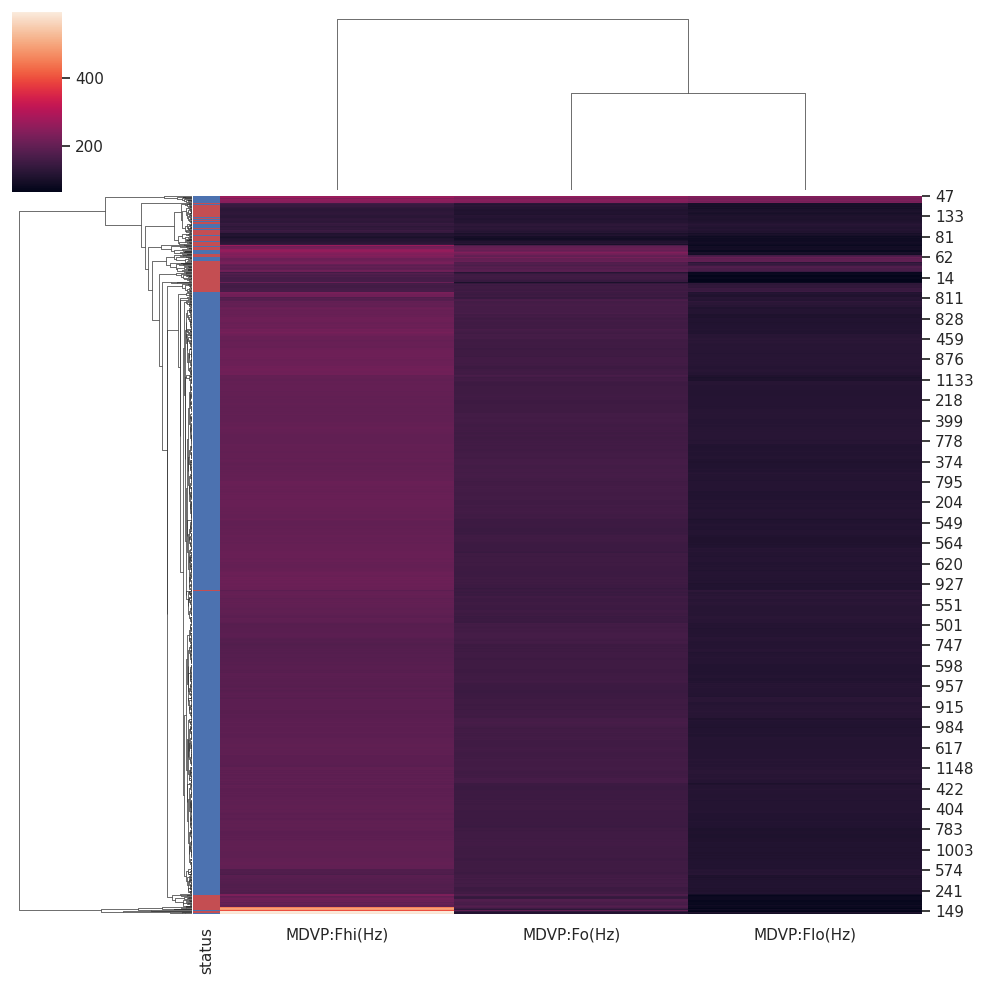

In [ ]:
# Outra forma de visualização
sns.clustermap(X.iloc[:,:3], row_colors=cores_linhas)